# Combine 9 epoch into 1 trial and then classfy the data based on trials
* this notebook will write methods for converting the data from 9 epochs to 1 trials and label those trials as either language or non languages
* The goal is to be able to convert our data into a two class problems which makes it easy for our classfier to distinguish signals in our data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE 
import os
import os.path as op
from os import listdir
from os.path import isfile, join
from collections import defaultdict

In [2]:
epoch=mne.read_epochs('C:\\USB Drive\\EpochedEEG\\20140206_1151_epo.fif',preload=True)

Reading C:\USB Drive\EpochedEEG\20140206_1151_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5583 matching events found
Applying baseline correction (mode: mean)
5583 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [9]:
epoch.ch_names

['Lm',
 'LE1',
 'Nasium',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'VEOG',
 'RE3',
 'Rm',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 

In [ ]:
epoch.drop_channels(['Lm','VEOG','Rm'])
#Drop the useless channels

In [8]:
epoch.events[:,-1]
epoch.events[1]

array([2580,    0,   31])

In [ ]:
for event in epoch.events[:,-1]:
    while event != 31:
        if event in (4 , 1, 13,16):
            event == 4
    else:
        epochs[i].append(event)

In [10]:
epochs=[[]]
i=0
for event in epoch.events[:,-1]:
    if event == 31:
        epochs.append([])
        i=i+1
        epochs[i].append(event)
    else:
        epochs[i].append(event)

In [11]:
epochs

[[131],
 [31, 144, 162, 8, 3, 7, 132, 134, 130],
 [31, 142, 162, 8, 3, 7, 132, 133, 129],
 [31, 142, 162, 8, 3, 7, 132, 133],
 [31, 142, 162, 8, 3, 7, 132, 133, 129],
 [31, 144, 162, 8, 3, 7, 131, 134],
 [31, 142, 162, 8, 3, 7, 131, 133],
 [31, 144, 162, 8, 3, 7, 131, 134],
 [31, 142, 162, 8, 3, 7, 132, 133],
 [31, 144, 162, 8, 3, 7, 131, 134],
 [31, 144, 162, 8, 3, 131, 7, 134],
 [31, 144, 162, 8, 3, 131, 7, 134],
 [31, 142, 162, 8, 3, 7, 132, 133, 129],
 [31, 142, 162, 8, 3, 7, 132, 133, 129],
 [31, 142, 162, 8, 3, 7, 132, 133, 129],
 [31, 144, 162, 8, 3, 131, 7, 134, 129],
 [31, 142, 162, 8, 3, 132, 7, 133],
 [31, 144, 162, 8, 3, 7, 131, 134, 129],
 [31, 142, 162, 8, 3, 7, 132, 133],
 [31, 144, 162, 8, 3, 7, 131, 134],
 [31, 144, 162, 8, 3, 7, 131, 134, 131],
 [31, 138, 158, 14, 21, 13, 132, 133, 129],
 [31, 138, 158, 14, 21, 13, 132, 133],
 [31, 145, 165, 14, 21, 13, 131, 133],
 [31, 138, 165, 14, 21, 13, 132, 134, 129],
 [31, 145, 158, 14, 21, 13, 131, 134, 129],
 [31, 145, 165, 1

for events in epochs:
    if  (155, 156, 157,158,159,160,161,162,163,164,165) in events:
            temp["congruent"].append(events)
    else:
            temp["incongruent"].append(events)

In [43]:
for events in epochs:
    if  4 in events or 1 in events or 13 in events or 16 in events:
        for i in range(len(events)):
                events[i]=4
    else:
        for i in range(len(events)):
                events[i]=5

In [44]:
epochs

[[5],
 [5, 5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5, 5],
 [4, 4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4],
 

In [54]:

len(epoch.events)

5424

In [49]:
len(epochs)

641

In [50]:
flattened_list = [y for x in epochs for y in x]

In [52]:
len(flattened_list)

5424

In [56]:
for i in range(len(epoch.events)):
    epoch.events[i]=flattened_list[i]

In [57]:
epoch.events[:,-1]

array([5, 5, 5, ..., 4, 4, 4])

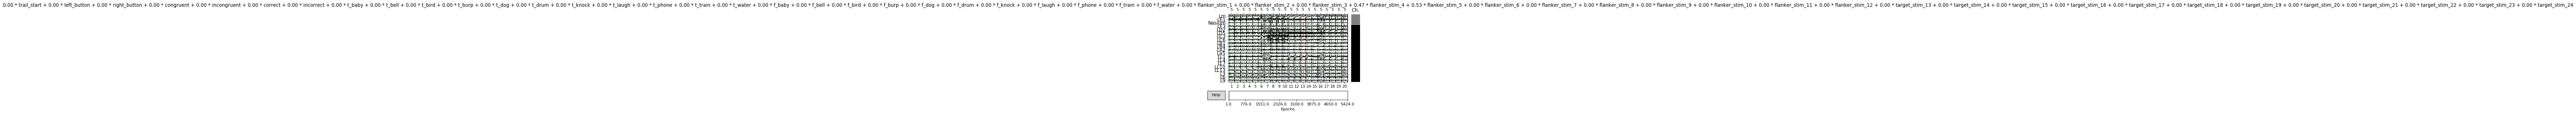

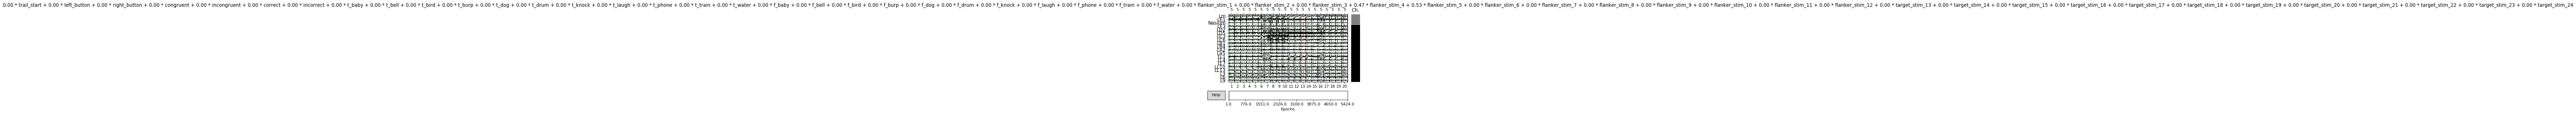

In [58]:
epoch.plot()

In [59]:
X = epoch.get_data()
y=epoch.events[:,-1]

clf = make_pipeline(Vectorizer(),
                        KNN(n_neighbors=13))
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
clf.fit(X_train, y_train)
    
score = clf.score(X_test, y_test)
print (score)

0.7721130221130221


In [6]:
def get_samples_targets(epochs):
    X = epochs.get_data();
    y = epochs.events[:,-1]
    return X, y

In [13]:
def filter_event_id(epoch):
    epochs=[[]]
    i=0
    for event in epoch.events[:,-1]:
        if event == 31:
            epochs.append([])
            i=i+1
            epochs[i].append(event)
        else:
            epochs[i].append(event)
    for events in epochs:
        if  4 in events or 1 in events or 13 in events or 16 in events:
            for i in range(len(events)):
                    events[i]=4
        else:
            for i in range(len(events)):
                    events[i]=5
    flattened_list = [y for x in epochs for y in x]
    for i in range(len(epoch.events)):
        epoch.events[i]=flattened_list[i]
    return epoch

In [8]:
def classify_test_KNN(X,y):

    clf = make_pipeline(Vectorizer(),
                        StandardScaler(),
                        KNN(n_neighbors=11))
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    
    return score

In [ ]:
scores1 = []
#LOOP through each subject files and convert those files into two class problem then classify.
path = 'C:\\USB Drive\\EpochedEEG\\run1'
subject_runs = [f for f in listdir(path) if isfile(join(path, f))]
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path, f),
                          preload=True);
    epochs = filter_event_id(epochs)
    X,y = get_samples_targets(epochs)
    scores1.append([f, classify_test_KNN(X,y)])
    print(scores1)

Reading C:\USB Drive\EpochedEEG\run1\20140205_1230_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5565 matching events found
Applying baseline correction (mode: mean)
5565 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
[['20140205_1230_epo.fif', 0.5443113772455089]]
Reading C:\USB Drive\EpochedEEG\run1\20140206_1029_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5384 matching events found
Applying baseline correction (mode: mean)


In [7]:
epoch = filter_event_id(epoch)

In [11]:
epoch.events[:,-1]

array([5, 5, 5, ..., 4, 4, 4])

In [ ]:
scores1 = []

path = 'C:\\USB Drive\\EpochedEEG\\run1'
subject_runs = [f for f in listdir(path) if isfile(join(path, f))]
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path, f),
                          preload=True);
    epochs = filter_event_id(epochs)
    X,y = get_samples_targets(epochs)
    scores1.append([f, classify_test_KNN(X,y)])
    print(scores1)

Reading C:\USB Drive\EpochedEEG\run1\20140207_1146_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5398 matching events found
Applying baseline correction (mode: mean)
[['20140207_1146_epo.fif', 0.5969135802469135]]
Reading C:\USB Drive\EpochedEEG\run1\20140207_1219_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5575 matching events found
Applying baseline correction (mode: mean)


In [9]:
epoch= filter_event_id(epoch)

In [10]:
X = epoch.get_data()
y=epoch.events[:,-1]

clf = make_pipeline(Vectorizer(),
                        KNN(n_neighbors=13))
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
clf.fit(X_train, y_train)
    
score = clf.score(X_test, y_test)
print (score)

1.0


In [9]:
scores1 = []

path = 'C:\\USB Drive\\EpochedEEG\\run1'
subject_runs = [f for f in listdir(path) if isfile(join(path, f))]
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path, f),
                          preload=True);
    epochs = filter_event_id(epochs)
    X,y = get_samples_targets(epochs)
    scores1.append([f, classify_test_KNN(X,y)])
    print(scores1)

Reading C:\USB Drive\EpochedEEG\run1\20140207_1219_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5575 matching events found
Applying baseline correction (mode: mean)
5575 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
[['20140207_1219_epo.fif', 0.539151225343694]]
Reading C:\USB Drive\EpochedEEG\run1\20140217_1136_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5584 matching events found
Applying baseline correction (mode: mean)
5584 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
[['20140207_1219_epo.fif', 0.539151225343694], ['20140217_1136_epo.fif', 0.545346062052506]]
Reading C:\USB Drive\EpochedEEG\run1\20140217_1211_epo.fif ...
    Found the data of interest:
        t =    -199.22 ..

In [4]:
score = [['20140207_1146_epo.fif', 0.5969135802469135],['20140205_1230_epo.fif', 0.5443113772455089],['20140206_1151_epo.fif',1.0],['20131216_1441_epo.fif',0.7721130221130221],['20140207_1219_epo.fif', 0.539151225343694], ['20140217_1136_epo.fif', 0.545346062052506], ['20140217_1211_epo.fif', 0.6118299445471349], ['20140219_1046_epo.fif', 0.5791411042944785]]

In [11]:
score

[['20140207_1146_epo.fif', 0.5969135802469135],
 ['20140205_1230_epo.fif', 0.5443113772455089],
 ['20140206_1151_epo.fif', 1.0],
 ['20131216_1441_epo.fif', 0.7721130221130221],
 ['20140207_1219_epo.fif', 0.539151225343694],
 ['20140217_1136_epo.fif', 0.545346062052506],
 ['20140217_1211_epo.fif', 0.6118299445471349],
 ['20140219_1046_epo.fif', 0.5791411042944785]]

[['20140207_1146_epo.fif' '0.5969135802469135']
 ['20140205_1230_epo.fif' '0.5443113772455089']
 ['20140206_1151_epo.fif' '1.0']
 ['20131216_1441_epo.fif' '0.7721130221130221']
 ['20140207_1219_epo.fif' '0.539151225343694']
 ['20140217_1136_epo.fif' '0.545346062052506']
 ['20140217_1211_epo.fif' '0.6118299445471349']
 ['20140219_1046_epo.fif' '0.5791411042944785']]


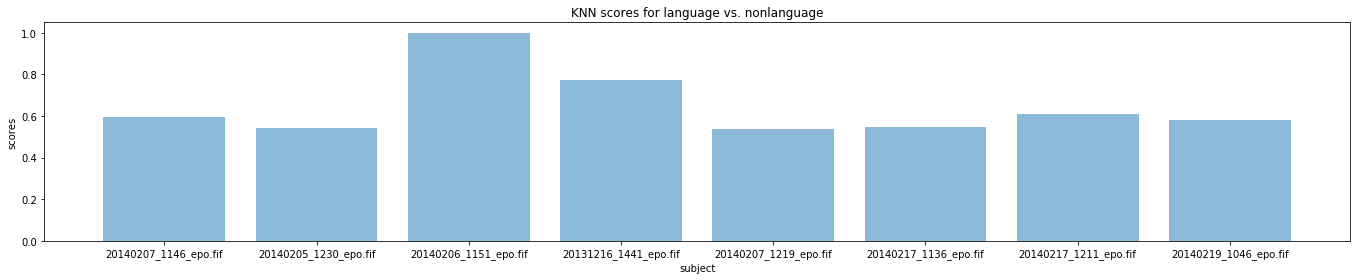

In [5]:
score=np.array(score)
print(score)
values4 = [float(x) for x in score[:,-1]]
subject = [x for x in score[:,0]]
fig, ax = plt.subplots(figsize = (19,4))
ax.bar(subject, values4, align='center', alpha=0.5);
ax.set_title('KNN scores for language vs. nonlanguage')
ax.set_xlabel('subject')
ax.set_ylabel('scores')
fig.tight_layout()

In [11]:
epoch =filter_event_id(epoch)

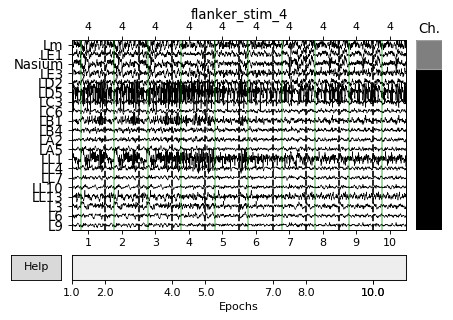

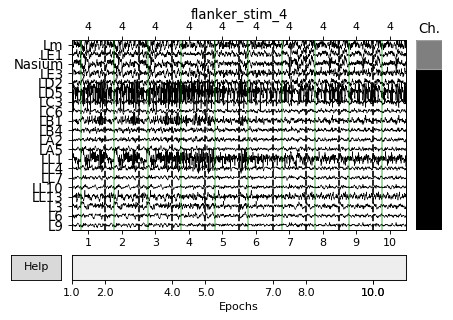

In [13]:
epoch[10:20].plot()

In [6]:
print(np.mean(values4))
print(np.max(values4))
print(np.min(values4))

0.6486007894804073
1.0
0.539151225343694


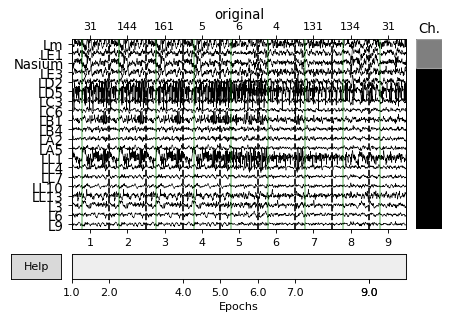

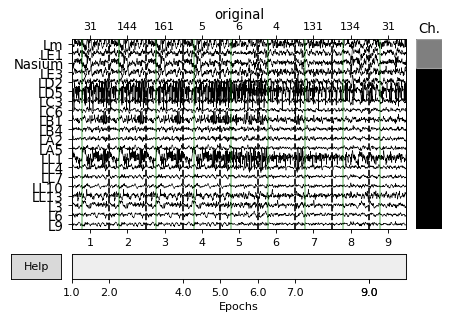

In [12]:
epoch[9:18].plot(title= 'original')

In [14]:
epochs=filter_event_id(epoch)

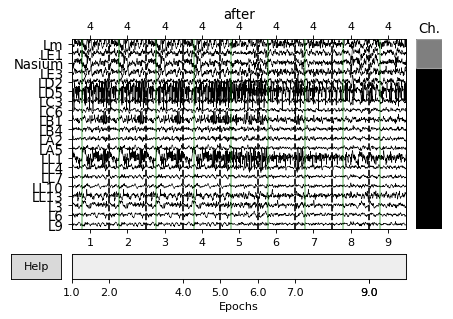

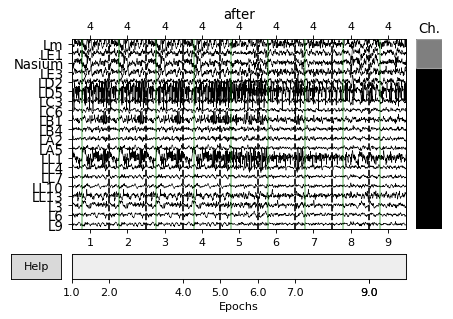

In [16]:
epochs[9:18].plot(title='after')

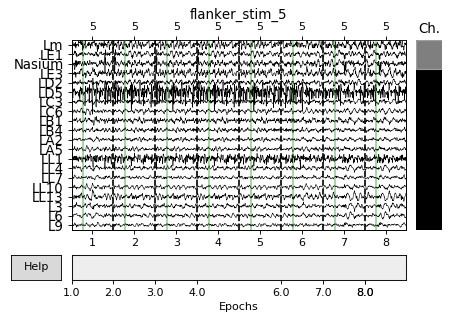

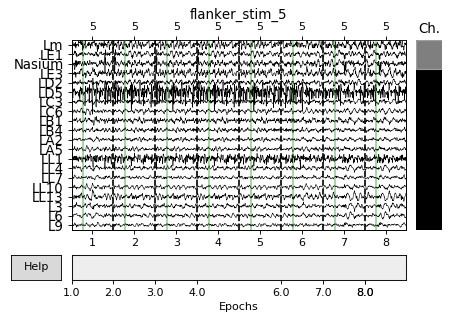

In [27]:
epochs[600:608].plot()

In [21]:
epoch.events[:,-1]

array([5, 4, 4, ..., 4, 4, 4])

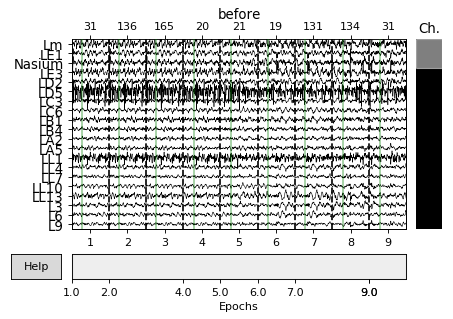

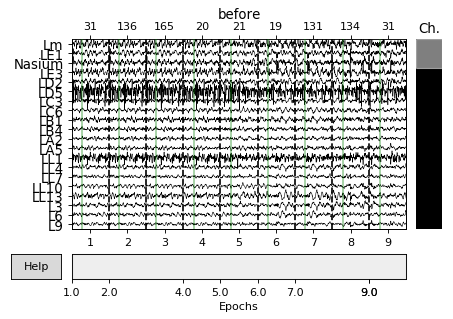

In [30]:
epoch[601:610].plot(title='before')

In [31]:
epochs=filter_event_id(epoch)

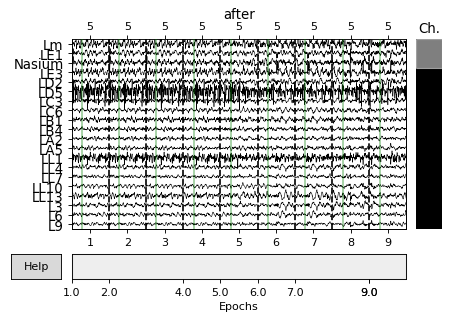

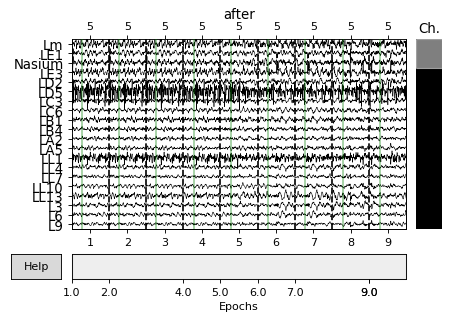

In [33]:
epochs[601:610].plot(title='after')

In [35]:
epoch.events[:,-1]

array([5, 4, 4, ..., 4, 4, 4])